In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Так как один признак, по формуле парной регрессии расчитаем коэффициенты b0 и b1

In [3]:
x = salary
y = scoring

b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b1

2.620538882402765

In [4]:
b0 = np.mean(y) - b1 * np.mean(x)
b0

444.1773573243596

Найдем те же коэффициены с помощью МНК

In [5]:
x2 = salary.reshape(-1, 1)
y2 = scoring.reshape(-1, 1)

ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((x2, ones))

XTX = x2.T.dot(x2)
np.linalg.det(XTX)

349463.9999999996

Определитель отличен от 0, поэтому существует аналитическое решение уравнений с помощью МНК

In [6]:
XTX_inv = np.linalg.inv(XTX) # Обратная матрица 

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[  2.62053888]
 [444.17735732]]


Коэффициенты найденные с помощью МНК и формул парной регшрессии равны. Уравнение регрессии

$$y = 444.177 + 2.621 \cdot x$$

С увеличением зарплаты на единицу, кредитный скоринг увеличится на 2.621. Построим линейную регрессию на графике

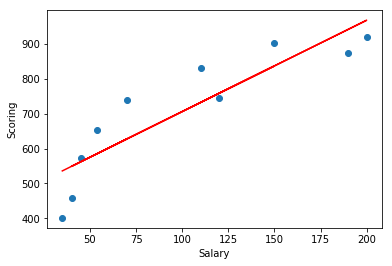

In [7]:
y_pred = b0 + b1 * x

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Salary')
plt.ylabel('Scoring');

На графике уравнение достаточно неплохо описывает данные. Найдем коэффициент детерминации

In [8]:
R2 = y_pred.var() / y.var()
R2

0.7876386635293678

78.76 %  дисперсии переменной  y  учитывается или объясняется моделью. Далее найдем среднюю ошибку аппроксимации

In [9]:
A = np.abs((y - y_pred) / y).mean()
A

0.11469251843561709

теоретические значение близки к тем, которые выдает модель линейной регрессии

Оценим значимость с помощью критерия Фишера

In [10]:
n = x.shape[0]
k1 = 1
k2 = n - k1 - 1

T = (R2 / (1 - R2)) * (k2 / k1)
T

29.67164085966437

In [11]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

T > T_крит, поэтому модель регрессии является статистически значимой

Найдем с помощью t-статистики доверительные интервалы для параметров регрессионой модели

In [12]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [13]:
s_slope = standard_error_slope(x, y, y_pred)

In [14]:
t = 2.306 # критерий Стьюдента при альфа = 0.05 и n = 8 
T = b1 / s_slope
T

5.447168150485579

5.447 > 2.306. Значение попало в критическую область, значит, гипотеза о равенстве нулю параметра  b1  отвергается.

In [15]:
t = 2.306
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111619555527858, 3.729915809252744)

с 95% вероятностью b1 принимает значение от 1.51 до 3.73

In [16]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [17]:
s_intercept = standard_error_intercept(x, y, y_pred)
s_intercept

56.46649755068153

In [18]:
T = b0 / s_intercept
T

7.866210524668863

7.866 > 2.306. Значение попало в критическую область, значит, гипотеза о равенстве нулю параметра b0 отвергается.

In [19]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.965613972488, 574.3891006762312)

с 95% вероятностью b1 принимает значение от 313.97 до 574.389

__Задача 2__

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица квантилей распределения Стьюдента?

__Ответ__: Если случайная величина задана нормальным распределением, известна её дисперсия, то используется таблица значений функции Лапласа. Если дисперсия не известна, а можно лишь найти её несмещенную оценку, то используется таблица распределения Стьюдента